# 1-rdt-data-visualization


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# set seaborn style
sns.set_style("white")
sns.set_context("paper")

In [3]:
# load data
df = pd.read_csv("../data/processed/contra_contacts_processed.csv")
df["DATE"] = pd.to_datetime(df["DATE"])

In [4]:
# descriptive summary
df.agg(
    {
        "AGE": ["min", "max", "median", "mean"],
        "DURATION_MIN": ["min", "max", "median", "mean"],
        "CONTACT_COUNT_TOTAL": ["min", "max", "median", "mean"],
        "SYMPTOM_COUNT": ["min", "max", "median", "mean"],
    }
)

,AGE,DURATION_MIN,CONTACT_COUNT_TOTAL,SYMPTOM_COUNT
min,1.000000,0.200000,0.000000,0.000000
max,106.000000,136.500000,83.000000,9.000000
median,42.000000,12.000000,2.000000,2.000000
mean,43.274315,13.837819,2.828603,2.214739


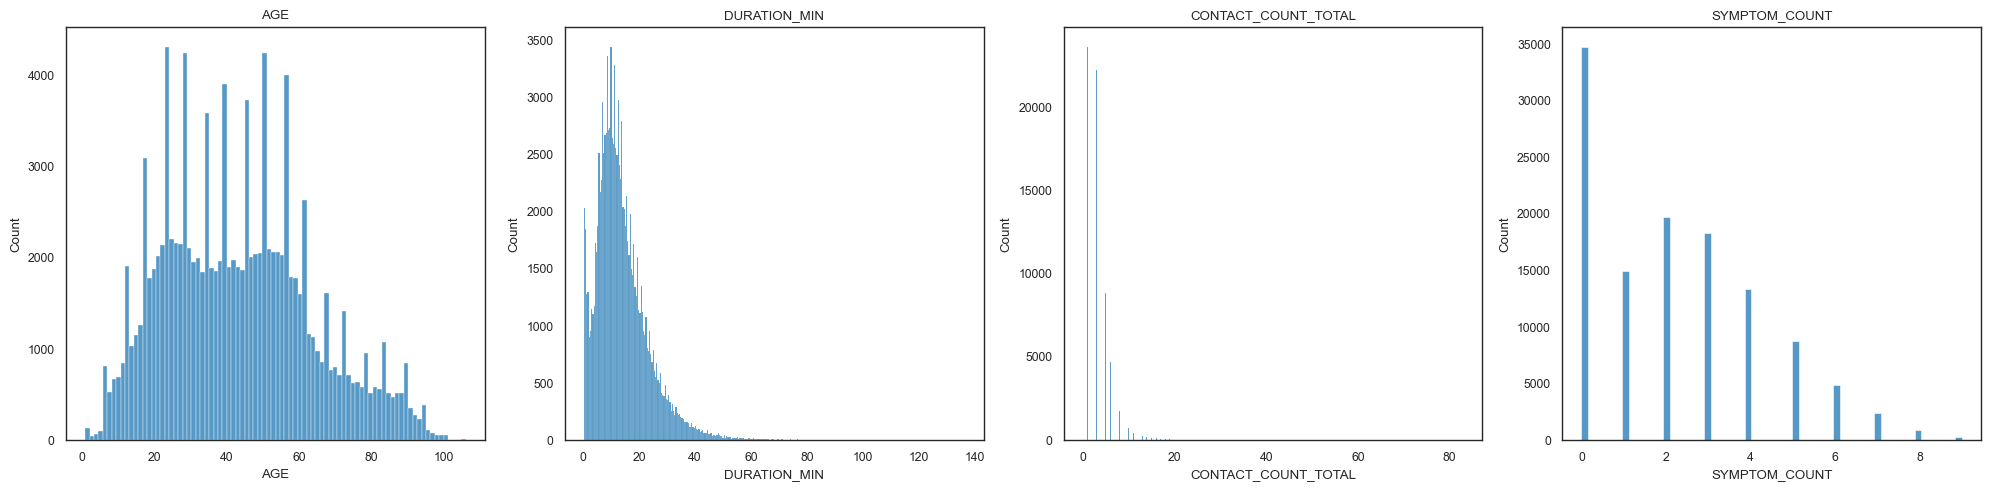

In [8]:
# histograms
columns_to_agg = ["AGE", "DURATION_MIN", "CONTACT_COUNT_TOTAL", "SYMPTOM_COUNT"]
num_plots_agg = len(columns_to_agg)

fig, axes = plt.subplots(1, num_plots_agg, figsize=(num_plots_agg * 5, 5))

for i, column in enumerate(columns_to_agg):
    sns.histplot(df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()
fig.savefig("../reports/figures/histograms-age-duration-contacts-symptoms.png", dpi=600)

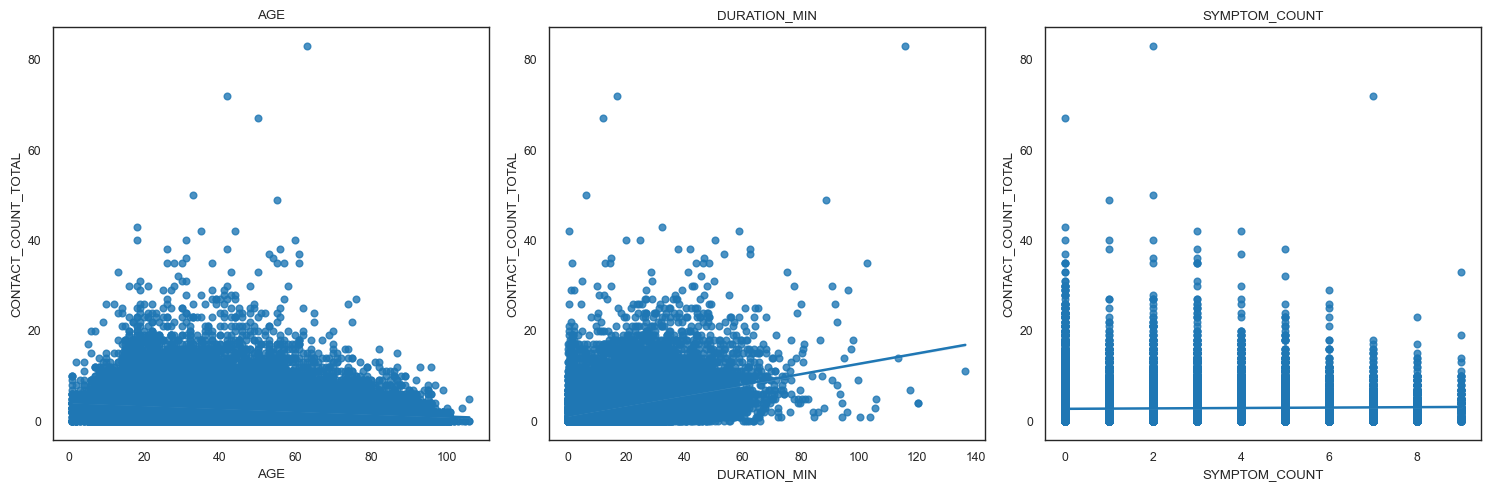

In [10]:
# regression plots
columns_to_reg = ["AGE", "DURATION_MIN", "SYMPTOM_COUNT"]
num_plots_reg = len(columns_to_reg)

fig, axes = plt.subplots(1, num_plots_reg, figsize=(num_plots_reg * 5, 5))

for i, column in enumerate(columns_to_reg):
    sns.regplot(x=df[column], y=df["CONTACT_COUNT_TOTAL"], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()
fig.savefig(
    "../reports/figures/regression-contacts-by-age-duration-symptoms.png", dpi=600
)

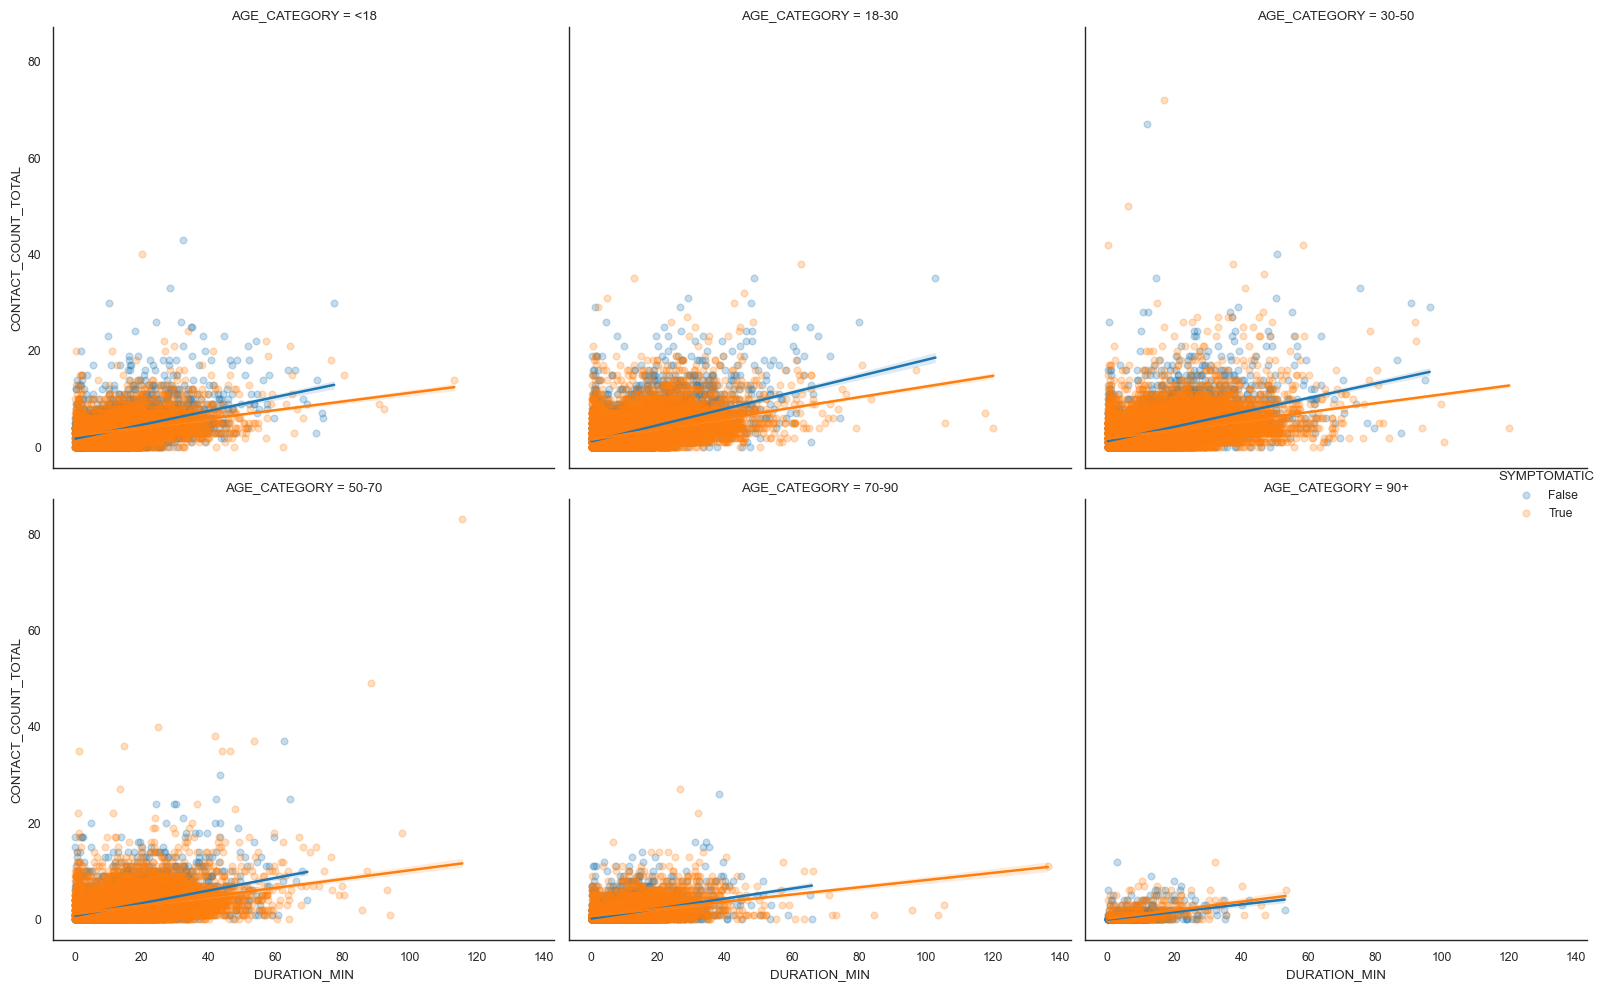

In [11]:
# regression plot of contact count by age category
g = sns.lmplot(
    data=df,
    x="DURATION_MIN",
    y="CONTACT_COUNT_TOTAL",
    col="AGE_CATEGORY",
    col_order=["<18", "18-30", "30-50", "50-70", "70-90", "90+"],
    col_wrap=3,
    hue="SYMPTOMATIC",
    fit_reg=True,
    scatter_kws={"alpha": 0.25},
)
plt.tight_layout()
plt.show()
g.savefig("../reports/figures/regression_contacts-by-age-category.png")

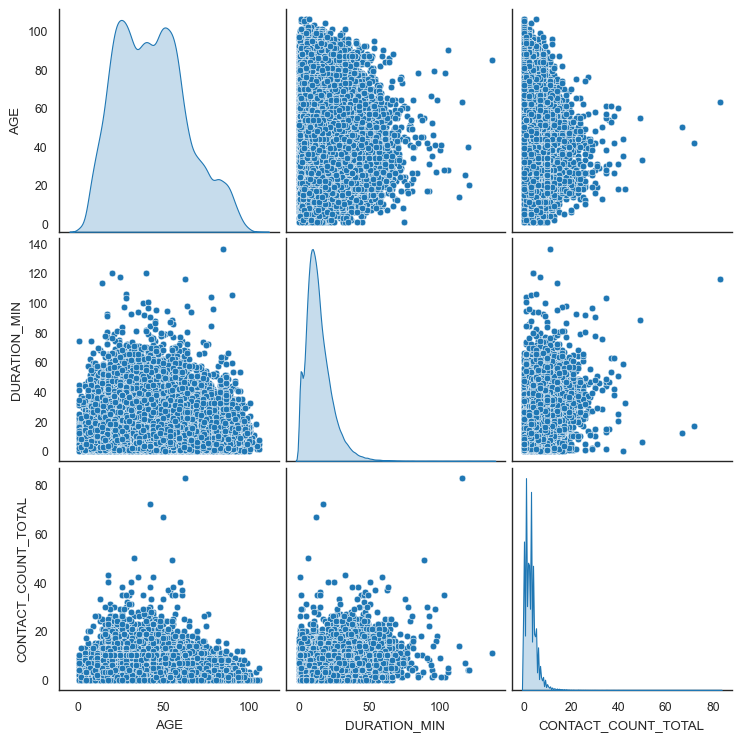

In [13]:
# pairplot of all variables
g = sns.pairplot(df.drop(columns=["SYMPTOMATIC", "SYMPTOM_COUNT"]), diag_kind="kde")
plt.show()
g.savefig("../reports/figures/pairplot-contacts-duration-age.png")

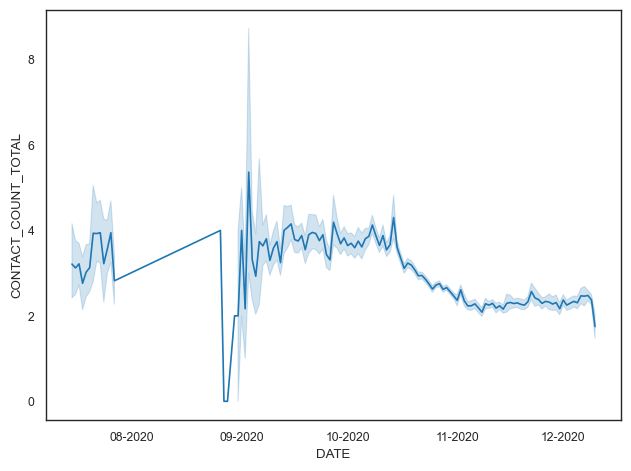

In [15]:
# time series plot
fig, ax = plt.subplots()  # manually calling plt.subplots to fix issue with savefig

sns.lineplot(data=df, x="DATE", y="CONTACT_COUNT_TOTAL", ax=ax)

# x-axis date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))

plt.tight_layout()
plt.show()

fig.savefig("../reports/figures/timeseries-contacts.png")